In [24]:
import datetime

import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np  

import pandas_datareader

import sklearn
import sklearn.linear_model
import sklearn.model_selection

import yfinance

yfinance.pdr_override()

In [25]:
df_aapl = pandas_datareader.data.get_data_yahoo('AAPL', '2020-01-01')

[*********************100%%**********************]  1 of 1 completed


In [26]:
df_aapl['SMA'] = df_aapl['Close'].rolling(window=14).mean()

In [27]:
df_aapl['label'] = df_aapl['Close'].shift(-30)
df_aapl.tail(35)

,Open,High,Low,Close,Adj Close,Volume,SMA,label
Date,,,,,,,,
2024-03-15,171.169998,172.619995,170.289993,172.619995,172.619995,121664700,174.375714,173.500000
2024-03-18,175.570007,177.710007,173.520004,173.720001,173.720001,75604200,173.739285,170.330002
2024-03-19,174.339996,176.610001,173.029999,176.080002,176.080002,55215200,173.357857,169.300003
2024-03-20,175.720001,178.669998,175.089996,178.669998,178.669998,53423100,173.209285,173.029999
2024-03-21,177.050003,177.490005,170.839996,171.369995,171.369995,106181300,172.617142,183.380005
2024-03-22,171.759995,173.050003,170.059998,172.279999,172.279999,71106600,172.415713,NaN
2024-03-25,170.570007,171.940002,169.449997,170.850006,170.850006,54288300,172.467856,NaN
2024-03-26,170.000000,171.419998,169.580002,169.710007,169.710007,57388400,172.510000,NaN
2024-03-27,170.410004,173.600006,170.110001,173.309998,173.309998,60273300,172.817857,NaN


In [28]:
X = np.array(df_aapl.drop(['label','SMA'], axis='columns'))
X = sklearn.preprocessing.scale(X)
X

C:\Users\hminagawa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\preprocessing\_data.py:261: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(


array([[-2.06990793, -2.08021142, -2.03949017, -2.04346893, -2.03329764,
         0.73773646],
       [-2.0631414 , -2.08035987, -2.02971477, -2.06518688, -2.05415639,
         0.94054379],
       [-2.08812529, -2.08495703, -2.05769783, -2.04755975, -2.03722671,
         0.41800778],
       ...,
       [ 0.7711303 ,  0.81335726,  0.80545404,  0.75939939,  0.7928961 ,
        -0.85401038],
       [ 0.85827666,  0.83441516,  0.8585845 ,  0.8703686 ,  0.90243089,
        -0.03413561],
       [ 1.27943568,  1.23718952,  1.20990259,  1.17828638,  1.20636844,
         1.15413562]])

In [29]:
y = np.array(df_aapl['label'])
y

array([81.23750305, 79.75      , 80.90499878, ...,         nan,
               nan,         nan])

In [30]:
X = X[:-30]
y = y[:-30]

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2)

In [31]:
lr = sklearn.linear_model.LinearRegression()
lr.fit(X_train, y_train)

accuracy = lr.score(X_test, y_test)
accuracy

0.862960278519165

In [32]:
predicted_data = lr.predict(X[-30:])
predicted_data

array([187.36992728, 189.77527964, 187.81496852, 184.72390447,
       183.92006047, 183.11204697, 185.28581579, 182.34164449,
       183.94954771, 185.29514784, 184.26438872, 183.57715838,
       185.20464073, 183.02327206, 177.31861006, 179.59316538,
       176.12360923, 172.39711749, 172.29798175, 173.42212328,
       178.11387786, 176.80803606, 175.49217298, 175.24047739,
       175.81022881, 170.99038734, 178.59642874, 179.14051783,
       181.5733009 , 173.50225837])

In [33]:
df_aapl['Predict'] = np.NaN

last_date = df_aapl.iloc[-1].name
one_day = 86400
next_day = last_date.timestamp() + one_day

In [34]:
for data in predicted_data:
    next_date = datetime.datetime.fromtimestamp(next_day)
    df_aapl.loc[next_date] = np.append([np.nan]*(len(df_aapl.columns)-1),data)
    next_day += one_day

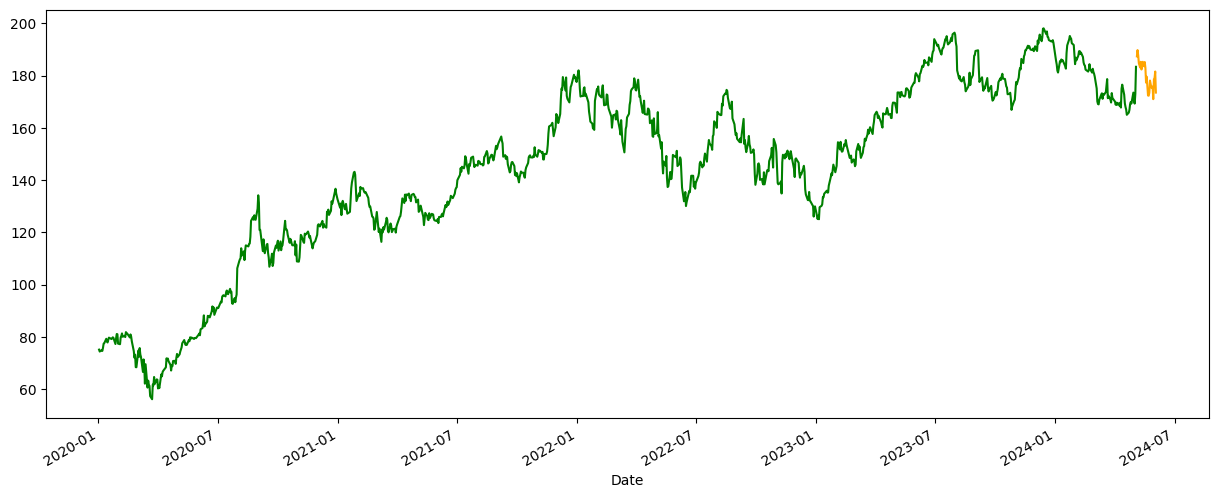

In [35]:
df_aapl['Close'].plot(figsize = (15,6), color = 'green')
df_aapl['Predict'].plot(figsize = (15,6), color = 'orange')
plt.show()